<a href="https://colab.research.google.com/github/tmckim/materials-fa23-colab-working/blob/main/lectures/lec06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start - Save this notebook!

When you open a new Colab notebook from the WebCampus (like you hopefully did for this one), you cannot save changes. So it's  best to store the Colab notebook in your personal drive `"File > Save a copy in drive..."` **before** you do anything else.

The file will open in a new tab in your web browser, and it is automatically named something like: "**Copy of lec06.ipynb**". You can rename this to just the title of the assignment "**lec06.ipynb**". Make sure you do keep an informative name (like the name of the assignment) so that you know which files to submit back to WebCampus for grading! More instructions on this are at the end of the notebook.


**Where does the notebook get saved in Google Drive?**

By default, the notebook will be copied to a folder called “Colab Notebooks” at the root (home directory) of your Google Drive. If you use this for other courses or personal code notebooks, I recommend creating a folder for this course and then moving the assignments AFTER you have completed them.

In [ ]:
# Setup and add files needed to gdrive
# If you restart colab, start by rerunning this cell first!
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#!mkdir -p '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/'
%cd /content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/
!rm -r materials-fa23-colab-working

!git clone https://github.com/tmckim/materials-fa23-colab-working '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/'

%cd /content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures/

In [1]:
############### TEST
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd /content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures/

Mounted at /content/gdrive
/content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures


In [2]:
# Import packages and other things needed
# Don't change this cell; Just run this cell
# If you restart colab, make sure to run this cell again after the first one above^

from datascience import *
import numpy as np
# path_data = '../../../assets/data/' ######### is this needed?

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Lecture 06 ##


Topics:
- Reviewing lots of things

## A Join Example ##

In [ ]:
# One table
full = Table.read_table('nc-est2019-agesex-res.csv')
census = full.select('SEX', 'AGE', 'POPESTIMATE2019')
census.show(3)

SEX,AGE,POPESTIMATE2019
0,0,3783052
0,1,3829599
0,2,3922044


In [ ]:
# A second table
sex_codes = Table().with_columns(
    'SEX CODE', make_array(0, 1, 2),
    'CODE DEFINITION', make_array('All', 'Selected Male', 'Selected Female')
)
sex_codes

SEX CODE,CODE DEFINITION
0,All
1,Selected Male
2,Selected Female


In [ ]:
# Join the tables
sex_codes.join('SEX CODE', census, 'SEX').sort('AGE').show(3)

SEX CODE,CODE DEFINITION,AGE,POPESTIMATE2019
0,All,0,3783052
1,Selected Male,0,1935117
2,Selected Female,0,1847935


## Bike Sharing ##

In [ ]:
# Read in the trip data from csv file
trip = Table.read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


## Distribution of Durations ##

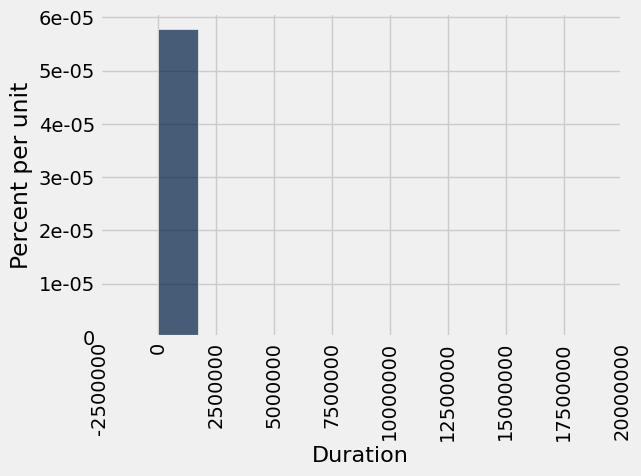

In [ ]:
# Visualize the durations (seconds)
trip.hist('Duration')

Why does the histogram look like this?

In [ ]:
# Sort by duration with largest values first
trip.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


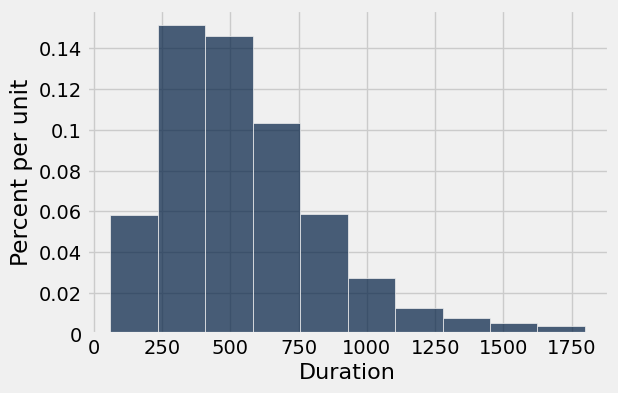

In [ ]:
# Just trips under 30 mins (free ride length)
commute = trip.where('Duration', are.below(60*30)) # 60 secs * 30 mins
commute.hist('Duration')

Why are there not any values right after 0?<br>Hint: there was a minimum time limit

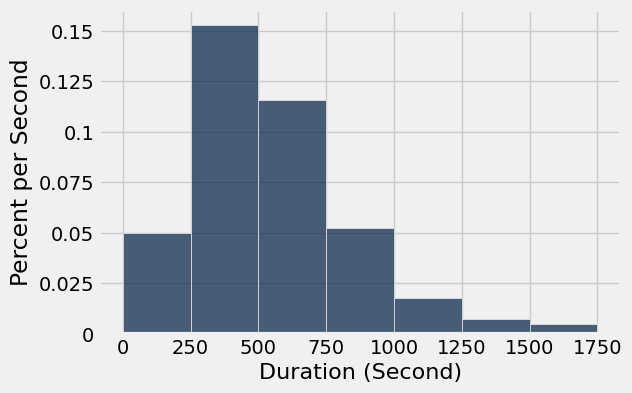

In [ ]:
# Now specify bins instead of letting hist automatically pick it
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

Based on the histogram, can you approximate the percent of people who have a ride duration between 250 and 500 seconds? <br>
Hint: Think about what formula you need and what information you have.

In [ ]:
# Approx percent of people who have
# a ride duration between 250 and 500 seconds
# "between" = [250, 500)

# area (percent) = width*height

(500-250) * 0.15

37.5

Calculating the exact value:

In [ ]:
# Get the number of rows using .where
commute.where('Duration', are.between(250, 500)).num_rows

129079

In [ ]:
# take number of trips from the duration window and divide by the number of rows in the table
# gives us percentage in that interval
129079 / commute.num_rows * 100

38.150338561755376

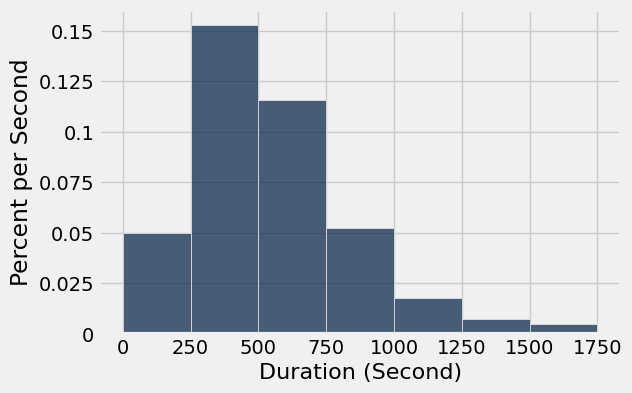

In [ ]:
# Same code as above
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

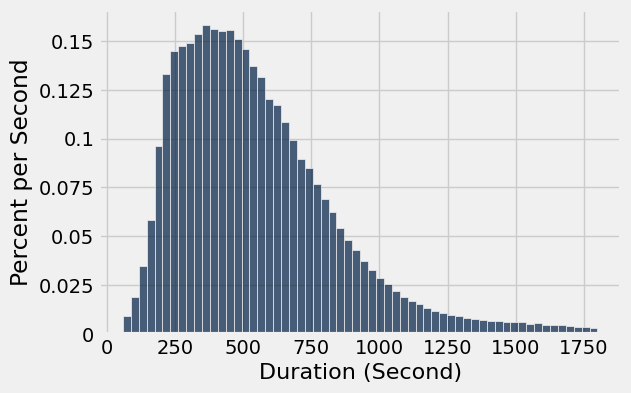

In [ ]:
 # Now put in a number of bins for comparison
commute.hist('Duration', bins=60, unit='Second')

## Start and End Stations ##

In [ ]:
# Most common start station
# group finds unique values of the Start Station and gets the count of those
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


What could we use to look at trips between stations?

In [ ]:
# Using group
commute.group(['Start Station', 'End Station'])

Start Station,End Station,count
2nd at Folsom,2nd at Folsom,54
2nd at Folsom,2nd at South Park,295
2nd at Folsom,2nd at Townsend,437
2nd at Folsom,5th at Howard,113
2nd at Folsom,Beale at Market,127
2nd at Folsom,Broadway St at Battery St,67
2nd at Folsom,Civic Center BART (7th at Market),47
2nd at Folsom,Clay at Battery,240
2nd at Folsom,Commercial at Montgomery,128
2nd at Folsom,Davis at Jackson,28


In [ ]:
# Using pivot

commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Why are there so many zeros? Anything you remember about what portion of the dataset we are using?

Let's look at the average duration for the combination of the stations?

In [ ]:
# Average durations of trips between stations
commute.pivot('Start Station', 'End Station', values='Duration', collect=np.average)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,702.13,253.874,309.087,418.065,0,0,424.15,740.714,0,0,668.886,516.897,495.519,0,862.889,388.117,493.469,1114.71,818.429,0,0,825,662.933,500.44,254.245,0,0,728.627,435.947,291.076,378.576,0,0,0,0,0,0,380.083,541.926,518.011,0,0,0,0,0,0,0,0,0,469.137,484.382,1037,0,0,0,0,0,0,0,0,836.684,365.579,0,0,575.923,250.553,646.038,0,617,386.032
2nd at South Park,196.085,618.116,237.366,507.394,0,0,450.279,715.247,0,0,900.679,589.368,612.456,0,640.081,317.625,404.27,940.253,648.948,0,0,732.632,815.671,501.608,230.486,0,0,834.396,513.307,323.982,423.605,0,0,0,0,0,0,328.813,616.429,567.77,0,0,0,0,0,0,0,0,0,281.635,349.079,780.958,0,0,0,0,0,0,0,0,831.879,359.105,0,0,490.479,356.287,473.056,0,722.063,395.474
2nd at Townsend,293.874,281.344,787.314,655.196,0,0,531.243,759.451,0,0,846.888,773.72,803.345,0,691.054,363.294,465.685,926.796,819.772,0,0,1070.59,919.073,609.987,371.105,0,0,877.591,731.92,506.895,673.452,0,0,0,0,0,0,666.625,865.7,776.333,0,0,0,0,0,0,0,0,0,262.334,310.047,985.214,0,0,0,0,0,0,0,0,1102.06,404.522,0,0,543.83,420.519,480.285,0,1092.67,585.169
5th at Howard,381.274,573.729,613.514,718.096,0,0,611.797,808.077,0,0,379.35,668.697,542.512,0,730.4,666.965,613.49,1056.59,952.167,0,0,469.741,834.692,676.55,281.975,0,0,449.548,295.297,414.857,545.6,0,0,0,0,0,0,410.043,255.956,357.799,0,0,0,0,0,0,0,0,0,434.022,386.263,605.708,0,0,0,0,0,0,0,0,553.362,584.98,0,0,662.308,406.225,546.84,0,972.07,206.704
Adobe on Almaden,0,0,0,0,462,583.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,942.176,616,0,0,0,0,0,0,0,0,0,463.92,0,0,0,0,0,0,0,639.857,858.571,534.438,0,0,0,0,0,546.316,399.435,292.702,0,360.4,684,1164.4,251.9,0,0,516.857,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,540.286,948.844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,955.312,952.6,0,0,0,0,0,0,0,0,0,706.762,0,0,0,0,0,0,0,684.917,902.333,965,0,0,0,0,0,536.667,782.1,778,0,373.393,1127.92,1222.24,219.985,0,0,645,0,0,0,0,0,0,0
Beale at Market,360.701,603.873,685.934,625,0,0,720.932,282.033,0,0,627.423,273.973,303.168,0,232.777,441.483,300.5,498.2,352.467,0,0,697.074,416.986,465.877,329.5,0,0,731.175,386.292,217.528,350.115,0,0,0,0,0,0,340.857,502.335,374.793,0,0,0,0,0,0,0,0,0,783.228,792.387,809.92,0,0,0,0,0,0,0,0,781.634,301.297,0,0,438.75,207.94,953.429,0,465.688,444.689
Broadway St at Battery St,613.672,826.899,719.695,931.891,0,0,331.727,688.682,0,0,94

In [ ]:
# Time it should take- direct without stopping
commute.pivot('Start Station', 'End Station', values='Duration', collect=min)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,61,97,164,268,0,0,271,407,0,0,483,329,306,0,494,239,262,687,599,0,0,639,416,282,80,0,0,506,237,167,250,0,0,0,0,0,0,208,264,290,0,0,0,0,0,0,0,0,0,300,303,584,0,0,0,0,0,0,0,0,590,208,0,0,318,149,448,0,429,165
2nd at South Park,61,60,77,86,0,0,78,345,0,0,290,188,171,0,357,104,81,490,341,0,0,369,278,122,60,0,0,416,142,61,68,0,0,0,0,0,0,60,237,106,0,0,0,0,0,0,0,0,0,63,66,458,0,0,0,0,0,0,0,0,399,63,0,0,79,61,78,0,270,96
2nd at Townsend,137,67,60,423,0,0,311,469,0,0,546,520,474,0,436,145,232,509,494,0,0,773,549,325,221,0,0,667,367,265,395,0,0,0,0,0,0,319,455,398,0,0,0,0,0,0,0,0,0,125,133,742,0,0,0,0,0,0,0,0,777,241,0,0,291,249,259,0,610,284
5th at Howard,215,300,384,68,0,0,357,530,0,0,179,412,364,0,543,419,359,695,609,0,0,235,474,453,145,0,0,269,161,250,306,0,0,0,0,0,0,234,89,202,0,0,0,0,0,0,0,0,0,256,221,347,0,0,0,0,0,0,0,0,375,402,0,0,455,265,357,0,553,109
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,701,387,0,0,0,0,0,0,0,0,0,229,0,0,0,0,0,0,0,441,452,318,0,0,0,0,0,309,146,182,0,207,358,876,101,0,0,369,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,305,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,526,546,0,0,0,0,0,0,0,0,0,403,0,0,0,0,0,0,0,288,875,685,0,0,0,0,0,440,420,153,0,166,624,759,116,0,0,301,0,0,0,0,0,0,0
Beale at Market,219,343,417,387,0,0,60,155,0,0,343,122,153,0,115,216,170,303,198,0,0,437,235,149,204,0,0,535,203,88,72,0,0,0,0,0,0,191,316,191,0,0,0,0,0,0,0,0,0,499,395,526,0,0,0,0,0,0,0,0,575,173,0,0,87,94,619,0,222,264
Broadway St at Battery St,351,424,499,555,0,0,195,62,0,0,520,90,129,0,70,340,284,128,101,0,0,961,148,168,357,0,0,652,351,218,221,0,0,0,0,0,0,255,376,316,0,0,0,0,0,0,0,0,0,611,599,799,0,0,0,0,0,0,0,0,738,336,0,0,169,291,885,0,134,411
California Ave Caltrain Station,0,0,0,0,0,0,0,0,82,1645,0,0,0,628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1771,0,484,131,0,0,0,0,0,0,0,1077,0,0,0,870,911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,499,0,0,0,0,0,0,0,0,0,0,0,0,201,108,0,0,0,0,0,0,0,0,0,654,0,0,0,953,696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


What if we wanted to put multiple numbers in our table that include the min and the max?

In [ ]:
# Define our own function and test it out
def min_and_max(values):
  return str(min(values)) + "," + str(max(values))

In [ ]:
# Time it should take- direct without stopping
commute.pivot('Start Station', 'End Station', values='Duration', collect=min_and_max)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,"61,1796","97,1365","164,1164","268,1565",,,"271,1253","407,1582",,,"483,1207","329,1118","306,939",,"494,1381","239,1144","262,1763","687,1776","599,1211",,,"639,1004","416,1155","282,1706","80,1643",,,"506,1543","237,1050","167,935","250,805",,,,,,,"208,989","264,1627","290,1361",,,,,,,,,,"300,1254","303,1742","584,1450",,,,,,,,,"590,1197","208,886",,,"318,937","149,890","448,1733",,"429,1128","165,1372"
2nd at South Park,"61,1478","60,1775","77,1641","86,1767",,,"78,1448","345,1686",,,"290,1730","188,1715","171,1708",,"357,1407","104,972","81,1381","490,1747","341,1765",,,"369,1064","278,1580","122,1595","60,1679",,,"416,1604","142,1407","61,1520","68,1530",,,,,,,"60,927","237,1279","106,1700",,,,,,,,,,"63,1646","66,1785","458,1317",,,,,,,,,"399,1435","63,1284",,,"79,1787","61,1663","78,1435",,"270,1290","96,1781"
2nd at Townsend,"137,1694","67,1755","60,1797","423,1524",,,"311,1747","469,1773",,,"546,1629","520,1640","474,1335",,"436,1516","145,1711","232,1764","509,1730","494,1736",,,"773,1761","549,1482","325,1798","221,1368",,,"667,1504","367,1789","265,1639","395,1555",,,,,,,"319,1687","455,1769","398,1721",,,,,,,,,,"125,1742","133,1477","742,1682",,,,,,,,,"777,1720","241,1706",,,"291,1726","249,1747","259,1722",,"610,1798","284,1699"
5th at Howard,"215,1425","300,1576","384,1279","68,1727",,,"357,1483","530,1749",,,"179,1734","412,1221","364,1601",,"543,1005","419,1469","359,1035","695,1775","609,1582",,,"235,1413","474,1589","453,1758","145,1294",,,"269,1761","161,1508","250,1321","306,1584",,,,,,,"234,1553","89,1719","202,1234",,,,,,,,,,"256,1625","221,1782","347,1387",,,,,,,,,"375,1432","402,1192",,,"455,1634","265,1515","357,1348",,"553,1627","109,1697"
Adobe on Almaden,,,,,"84,1434","275,809",,,,,,,,,,,,,,,,,,,,"701,1271","387,1391",,,,,,,,,,"229,1266",,,,,,,,"441,1030","452,1756","318,1267",,,,,,"309,1157","146,1337","182,1233",,"207,1228","358,1113","876,1325","101,1287",,,"369,1136",,,,,,,
Arena Green / SAP Center,,,,,"305,1433","62,1789",,,,,,,,,,,,,,,,,,,,"526,1448","546,1267",,,,,,,,,,"403,1375",,,,,,,,"288,1748","875,918","685,1300",,,,,,"440,674","420,1240","153,1617",,"166,1403","624,1789","759,1749","116,1385",,,"301,1045",,,,,,,
Beale at Market,"219,910","343,1529","417,1654","387,1709",,,"60,1787","155,1288",,,"343,1356","122,1667","153,1104",,"115,1780","216,1617",

How can we find the fastest trip ever between each pair of stations using group?

In [ ]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [ ]:
shortest = duration.group(['Start Station', 'End Station'], min)
shortest.show(5)

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219


## Discussion question

Find the 5 stations closest to Civic Center BART by minimum trip time.

In [ ]:
from_cc = shortest.where(
    'Start Station', are.containing('Civic Center BART')).sort(
    'Duration min')
from_cc.take(np.arange(5)).column('End Station')

array(['Civic Center BART (7th at Market)', 'Powell Street BART',
       'Market at 10th', 'Golden Gate at Polk', 'San Francisco City Hall'],
      dtype='<U45')

## Maps ##

In [ ]:
## Need this dataset

# Geographical data on the stations (dropping some columns we don't need)
stations = Table.read_table('station.csv').drop(4, 6)
stations

FileNotFoundError: ignored

In [ ]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations
 .select('lat', 'long', 'name')
 .relabeled('name', 'labels'))
sf_stations_map_data.show(3)

In [ ]:
Marker.map_table(sf_stations_map_data)

In [ ]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

In [ ]:
from_cc.show(3)

In [ ]:
sf_stations_map_data.show(3)

In [ ]:
close_cc = from_cc.where('Duration min', are.below(4 * 60))
close_markers = (sf_stations_map_data
      .join('labels', close_cc, 'End Station')
      .select('lat', 'long', 'labels'))
Marker.map_table(close_markers)

Choose marker colors by the minimum time from Civic Center

In [ ]:
minutes = np.round(from_cc.column("Duration min") / 60)
print(min(minutes), max(minutes))

In [ ]:
colors = Table().with_columns(
    "minutes", np.arange(15),
    "colors",  ["darkblue", "blue", "lightblue",
                "darkgreen", "green", "lightgreen",
                "orange", "darkred", "red",
                "gray", "gray", "gray",
                "gray", "gray", "gray"])
colors_cc = (from_cc
 .with_column("Minutes", minutes)
 .join("Minutes", colors, "minutes"))

colored_markers = (sf_stations_map_data
      .join('labels', colors_cc, 'End Station')
      .select('lat', 'long', 'labels', 'colors'))
Marker.map_table(colored_markers)

In [ ]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts.show(3)

In [ ]:
sf_starts = station_starts.relabeled(
    'name', 'labels').where('landmark', 'San Francisco')

In [ ]:
sf_starts_map_data = sf_starts.select('lat', 'long', 'labels').with_columns(
    'colors', 'blue',
    'areas', sf_starts.column('count') / 10
)
sf_starts_map_data.show(3)

In [ ]:
Circle.map_table(sf_starts_map_data)

## Part 2 - Conditionals and Iteration ##

Now I'll introduce boolean expressions, conditional, and for loops.

## Comparison ##

We have already seen basic boolean expressions before

In [ ]:
3 > 1

True

In [ ]:
type(3 > 1)

bool

In [ ]:
type(True)

bool

In [ ]:
true

NameError: ignored

(We see that capitalization matters.)

Recall that the single `=` is assignment Thus the following error:

In [ ]:
3 = 3

SyntaxError: ignored

Equality:

In [ ]:
3 == 3.0

True

Inequality (not equal to):

In [ ]:
10 != 2

True

Using variables in boolean expressions:

In [ ]:
x = 14
y = 3

In [ ]:
x > 15

False

In [ ]:
12 < x

True

In [ ]:
x < 20

True

Compound boolean expressions:

In [ ]:
12 < x < 20

True

In [ ]:
(12 < x) and (x < 20)

True

In [ ]:
(12 < x) and (x < 5)

False

In [ ]:
(12 < x) or (x < 5)

True

In [ ]:
10 < x - y < 13

True

In [ ]:
x > 13 and y < 3.14159

True

(The comparison `12 < x < 20` is equivalent to `12 < x and x < 20`.)

## Comparisons with arrays

In [ ]:
# An array of pets
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [ ]:
# Here it checks whether each element in the array is equal (==) to cat
pets == 'cat'

array([ True,  True, False,  True, False, False], dtype=bool)

How many cats?

In [ ]:
sum(pets == 'cat')

3

Math with booleans

In [ ]:
# Converts to true and false and then counts them as one or zero
np.mean(pets == 'cat')

0.5

In [ ]:
# An assignment statement with equality operation
is_cat = pets == 'cat'
is_cat

array([ True,  True, False,  True, False, False], dtype=bool)

In [ ]:
is_cat * 2 - 1

array([ 1,  1, -1,  1, -1, -1])

In [ ]:
sum(make_array(True, True, False, True, False, False))

3

In [ ]:
np.count_nonzero(pets == 'dog')

2

In [ ]:
x = np.arange(20, 31)
x

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
x > 28

array([False, False, False, False, False, False, False, False, False,
        True,  True], dtype=bool)

In [ ]:
sum(x > 28)

2

## Rows & Apply

In [ ]:
# Read in data table
survey = Table.read_table('welcome_survey_sp22.csv')
survey.show(3)

Year,Extroversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second,5,5,8,Left-handed,Left leg in first,On your left side,Ants,0
Fourth,2,3,7,Right-handed,Left leg in first,On your left side,"Beetles, Centipedes, Scorpions",0
First,3,4,8,Right-handed,Right leg in first,On your back,Bird,0


In [ ]:
# first row
survey.row(0)

Row(Year='Second', Extroversion=5, Number of textees=5, Hours of sleep=8.0, Handedness='Left-handed', Pant leg='Left leg in first', Sleep position='On your left side', Pets='Ants', Piercings=0)

In [ ]:
r = survey.row(0)

In [ ]:
type(r)

datascience.tables.Row

In [ ]:
r.item(0)

Getting a field from a row

In [ ]:
r.item('Year')

'Second'

In [ ]:
r.item(2)

5

## Math on Rows

In [ ]:
r2 = survey.select('Extroversion', 'Number of textees', 'Hours of sleep').row(1)
r2

Row(Extroversion=2, Number of textees=3, Hours of sleep=7.0)

We can apply aggregation functions to that row

In [ ]:
sum(r2)

12.0

Recall that if we wanted to **apply** a function to all the rows of a table we use `apply`

In [ ]:
 survey.select('Extroversion', 'Number of textees', 'Hours of sleep')

Extroversion,Number of textees,Hours of sleep
5,5,8
2,3,7
3,4,8
4,8,8
4,2,6
5,4,7
4,2,8
4,4,4
3,3,7
2,2,7


In [ ]:
 survey.select('Extroversion', 'Number of textees', 'Hours of sleep').apply(sum)

array([ 18.,  12.,  15., ...,  20.,  28.,  29.])

Let's use this to improve our pivot table

In [ ]:
p = survey.pivot('Sleep position', 'Hours of sleep')
p.show()

Hours of sleep,On your back,On your left side,On your right side,On your stomach
3,0,1,1,0
4,8,2,4,3
5,15,13,23,9
5.5,1,0,2,0
6,51,87,91,33
6.5,5,1,5,1
7,123,119,183,58
7.5,11,9,5,6
8,77,83,136,62
8.5,5,3,2,3


Add row totals to the table for the values of sleep positions

In [ ]:
# Add total column to table
p.with_column('Total', p.drop('Hours of sleep').apply(sum))

Hours of sleep,On your back,On your left side,On your right side,On your stomach,Total
3,0,1,1,0,2
4,8,2,4,3,17
5,15,13,23,9,60
5.5,1,0,2,0,3
6,51,87,91,33,262
6.5,5,1,5,1,12
7,123,119,183,58,483
7.5,11,9,5,6,31
8,77,83,136,62,358
8.5,5,3,2,3,13


Why is `Hours of sleep` still in the table?

Do the same thing with a `group` and a `join`:

In [ ]:
p.join('Hours of sleep', survey.group('Hours of sleep')).show()

Hours of sleep,On your back,On your left side,On your right side,On your stomach,count
3,0,1,1,0,2
4,8,2,4,3,17
5,15,13,23,9,60
5.5,1,0,2,0,3
6,51,87,91,33,262
6.5,5,1,5,1,12
7,123,119,183,58,483
7.5,11,9,5,6,31
8,77,83,136,62,358
8.5,5,3,2,3,13


## Conditional Statements

Conditional statements in python allow us to do different things based on the values in our data

In [ ]:
x = 20

If the value of x is greater than or equal to 18 then print 'You can legally vote'

In [ ]:
# What happens if x changes?
if x >= 18:
    print('You can legally vote.')

You can legally vote.


Notice that if the boolean expression is False then the body of the if statement is not executed:



In [ ]:
print("Can you drink?")

if x >= 21:
    print('You can legally drink.')
    print("This line of code is never run...")
    x = 0

print("This is run")
print("The value of x is", x)

Can you drink?
This is run
The value of x is 20


Sometimes you want to do something else if hte first statement wasn't true:

In [ ]:
if x >= 21:
    print('You can legally vote and drink.')
else:
    print('You can legally drink milk.')

You can legally drink milk.


In [ ]:
if x >= 21:
    print('You can legally vote and drink.')
elif x >= 18:
    print('You can legally vote.')
else:
    print('You can legally drink milk.')

You can legally vote.


Implementing a function with conditionals and multiple return values:

In [ ]:
def age(x):
    if x >= 18:
        return 'You can legally vote.'
    if x >= 21:
        return 'You can legally drink.'

In [ ]:
age(3)

In [ ]:
age(20)

'You can legally vote.'

In [ ]:
age(25)

'You can legally vote.'

In [ ]:
def age(x):
    if x >= 21:
        return 'You can legally vote and drink.'
    elif x >= 18:
        return 'You can legally vote.'
    else:
        return 'You can legally drink milk.'

In [ ]:
age(3)

'You can legally drink milk.'

In [ ]:
age(20)

'You can legally vote.'

In [ ]:
age(23)

'You can legally vote and drink.'

## Putting the pieces together <br>
Here we will build a function that returns whether the trip was one day or a round trip

In [ ]:
# Bike sharing dataset (already have from above, reminder)
trip = Table().read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [ ]:
# Define a function to determine the kind of trip
def trip_kind(start, end):
    if start == end:
        return 'round trip'
    else:
        return 'one way'

In [ ]:
# Add a column of the kind of trip to the table by using apply and our new function to the rows of data
kinds = trip.with_column('Trip Kind', trip.apply(trip_kind, 'Start Station', 'End Station'))
kinds.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Trip Kind
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,one way
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,one way
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,one way


In [ ]:
# Now create a pivot table
kinds_pivot = kinds.where('Duration', are.below(600)).pivot('Trip Kind', 'Start Station').sort('round trip', descending = True).take(np.arange(10))
kinds_pivot

Start Station,one way,round trip
Embarcadero at Sansome,6938,120
Harry Bridges Plaza (Ferry Building),8643,105
San Francisco Caltrain 2 (330 Townsend),12021,104
2nd at South Park,6484,98
San Francisco Caltrain (Townsend at 4th),11181,95
2nd at Townsend,9513,83
Powell Street BART,7156,81
Market at 10th,6599,80
Civic Center BART (7th at Market),5179,73
Townsend at 7th,8073,68


## Simulation

We will use simulation heavily in this class. A key element of simulation is leveraging randomness. The numpy python library has many functions for generating random events. Today we will use the `np.random.choice` function:

### Random Selection

In [ ]:
mornings = make_array('wake up', 'sleep in')

In [ ]:
np.random.choice(mornings)

'wake up'

In [ ]:
np.random.choice(mornings)

'sleep in'

In [ ]:
np.random.choice(mornings)

'wake up'

We can also pass an argument that specifies how many times to make a random choice:

In [ ]:
np.random.choice(mornings, 7)

array(['wake up', 'sleep in', 'wake up', 'wake up', 'sleep in', 'wake up',
       'sleep in'],
      dtype='<U8')

In [ ]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['wake up', 'sleep in', 'wake up', 'wake up', 'wake up', 'sleep in',
       'wake up'],
      dtype='<U8')

In [ ]:
sum(morning_week == 'wake up')

5

In [ ]:
sum(morning_week == 'sleep in')

2

## Playing a Game of Chance

Let's play a game: we each roll a die.

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Simulating the roll of a die

In [12]:
die_faces = np.arange(1, 7)
die_faces

array([1, 2, 3, 4, 5, 6])

In [13]:
np.random.choice(die_faces)

1

Implement a function to simulate a single round of play and return the results

In [14]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)

    if my_roll > your_roll:
      return 1
    elif my_roll < your_roll:
      return -1
    else:
      return 0

In [15]:
simulate_one_round()

-1

### Appending Arrays

Sometimes we will want to collect the outcomes of our simulations into a single array. We can do this by appending each experiment to the end of an array using the numpy `np.append` function.

In [3]:
# Setup two arrays
first = np.arange(4)
second = np.arange(10, 17)

In [4]:
# Add on to the first array
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [5]:
# The first array doesn't change
first

array([0, 1, 2, 3])

In [6]:
# Make a longer array
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [7]:
# Again, first doesn't change
first

array([0, 1, 2, 3])

In [8]:
# And second doesn't change
second

array([10, 11, 12, 13, 14, 15, 16])

### Repeated Betting ###

In [9]:
results = make_array()

In [16]:
results = np.append(results, simulate_one_round())
results

array([-1.])

In [17]:
results = np.append(results, simulate_one_round())
results

array([-1., -1.])

## `For` Statements

The for statement is another way to apply code to each element in a list or an array.



In [ ]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [18]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


What is the output of this for loop?

In [19]:
x = 0
for i in np.arange(1,4):
  x = x + i
  print(x)

print('The final value of x is:', x)

1
3
6
The final value of x is: 6


Use a for loop to simulate the total outcome of plays of our game of chance:

In [20]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())

game_outcomes

array([ 1., -1.,  1.,  1.,  1.])

In [21]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())

game_outcomes

array([-1.,  1.,  1., ...,  1.,  1.,  0.])

In [22]:
len(game_outcomes)

10000

In [23]:
results = Table().with_column('My winnings', game_outcomes)

In [24]:
results

My winnings
-1
1
1
0
1
-1
-1
-1
1
1


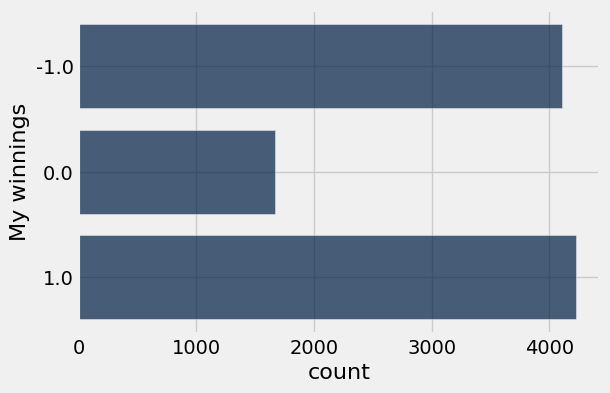

In [25]:
results.group('My winnings').barh('My winnings')

### Another example: simulating heads in 100 coin tosses

In [26]:
# Example coin flip
coin = make_array('heads', 'tails')

In [30]:
# Use np.random.choice to pick
np.random.choice(coin)

'tails'

In [37]:
# Pick multiple times
ten_picks = np.random.choice(coin, 10)
ten_picks

array(['tails', 'heads', 'heads', 'heads', 'tails', 'heads', 'heads',
       'heads', 'tails', 'tails'],
      dtype='<U5')

In [38]:
ten_picks == 'heads'

array([False,  True,  True,  True, False,  True,  True,  True, False, False], dtype=bool)

In [39]:
sum(ten_picks == 'heads')

6

In [40]:
# Count the sum of heads coin flip results in our array
sum(np.random.choice(coin, 10) == 'heads')

8

In [41]:
sum(np.random.choice(coin, 100) == 'heads')

56

In [32]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [33]:
# Decide how many times you want to repeat the experiment
repetitions = 10000

In [34]:
# Simulate that many outcomes
outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

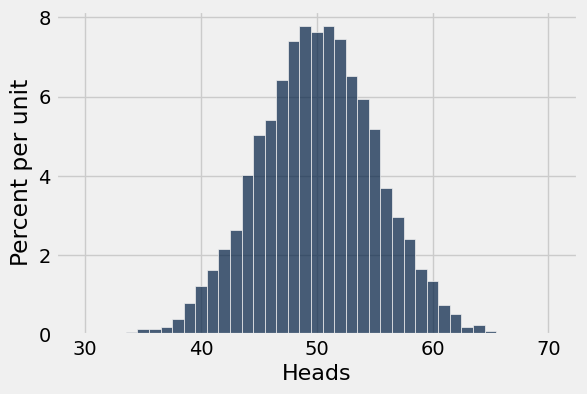

In [35]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

## Optional: Advanced `where` ##

In [ ]:
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_column('Age', ages)

In [ ]:
age

Age
16
22
18
15
19
15
16
21


In [ ]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [ ]:
voter = ages >= 18

In [ ]:
voter

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [ ]:
age.where(voter)

Age
22
18
19
21


In [ ]:
is_voter = are.above_or_equal_to(18)

In [ ]:
type(is_voter)

datascience.predicates._combinable

In [ ]:
is_voter(22)

True

In [ ]:
is_voter(3)

False

In [ ]:
age.apply(is_voter, 'Age')

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [ ]:
ages >= 18

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [ ]:
voter

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [ ]:
def my_voter_function(x):
    return x >= 18

In [ ]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [ ]:
age.where(voter)

Age
22
18
19
21


In [ ]:
age.where('Age', my_voter_function)

Age
22
18
19
21
